<a href="https://colab.research.google.com/github/Laci1004/Heller/blob/master/Heller_advanced_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance
#!pip install dash
#!pip install dash-html-components
#!pip install dash-core-components


import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,7

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import plotly.express as px

import seaborn as sns; sns.set()

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output

In [ ]:
df = yf.download("SPY", start="2010-01-01", end="2021-06-01")
#df = df.dropna()

split_percentage = 0.7     #70% train 30% test

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.shape[0]

2872

## **K Nearest Neighbors**

In [ ]:
#KNN - K nearest neigbhours
knn_df = df.copy()
knn_df['Open-Close']= knn_df.Open - knn_df.Close
knn_df['High-Low']  = knn_df.High - knn_df.Low
knn_df = knn_df.dropna()
X = knn_df[['Open-Close', 'High-Low']]

Y = np.where(knn_df['Close'].shift(-1)>knn_df['Close'],1,-1)
X.head()

,Open-Close,High-Low
Date,,
2009-12-31,1.329994,1.410004
2010-01-04,-0.959999,1.879997
2010-01-05,-0.369995,0.830002
2010-01-06,-0.190002,0.559998
2010-01-07,-0.690002,1.150002


In [ ]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(knn_df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(2010, 2) (862, 2)
(2010,) (862,)


In [ ]:

knn = neighbors.KNeighborsClassifier(n_neighbors=30)

# fit the model
knn.fit(X_train, Y_train)

# accuracy
knn_accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
knn_accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %knn_accuracy_train)
print ('Test_data Accuracy: %.2f' %knn_accuracy_test)

Train_data Accuracy: 0.58
Test_data Accuracy: 0.52


In [ ]:
# Cumulative Returns 
#Strategy
knn_df['Predicted_Signal'] = knn.predict(X)
knn_df['SPY_returns'] = np.log(knn_df['Close']/knn_df['Close'].shift(1))
knn_cumSPY_return = knn_df[split:]['SPY_returns'].cumsum()*100

#SPY
knn_df['Strategy_returns'] = knn_df['SPY_returns']* knn_df['Predicted_Signal'].shift(1)
knn_cumSTRAT_return = knn_df[split:]['Strategy_returns'].cumsum()*100

[None, None, None, None]

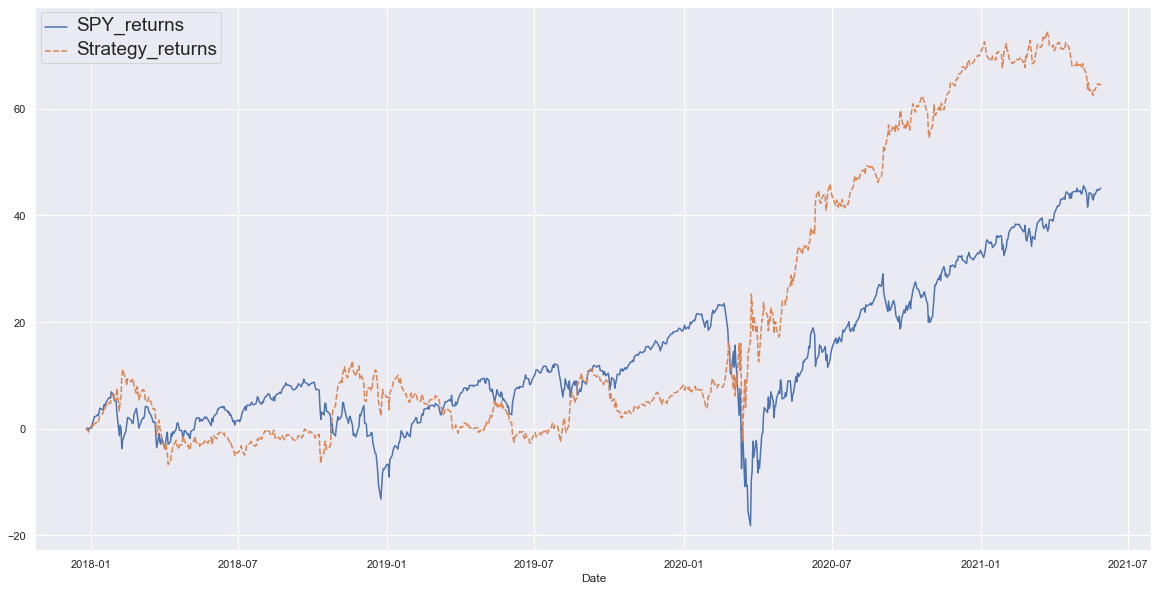

In [ ]:
knn_graph_df = pd.concat([knn_cumSPY_return, knn_cumSTRAT_return], axis=1)
#plt.plot(graph_df)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1) 
ax = sns.lineplot(data = knn_graph_df)
plt.setp(ax.get_legend().get_texts(), fontsize='19')


In [ ]:
knn_df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,SPY_returns,Strategy_returns
Date,,,,,,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,89.275963,90637900,1.329994,1.410004,-1,NaN,NaN
2010-01-04,112.370003,113.389999,111.510002,113.330002,90.790062,118944600,-0.959999,1.879997,-1,0.016818,-0.016818
2010-01-05,113.260002,113.680000,112.849998,113.629997,91.030411,111579900,-0.369995,0.830002,1,0.002644,-0.002644
2010-01-06,113.519997,113.989998,113.430000,113.709999,91.094490,116074400,-0.190002,0.559998,1,0.000704,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,91.479050,131091100,-0.690002,1.150002,1,0.004212,0.004212
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,417.339996,420.320007,417.079987,419.170013,419.170013,51376700,-1.830017,3.240021,-1,0.010143,0.010143
2021-05-25,420.329987,420.709991,417.619995,418.239990,418.239990,57451400,2.089996,3.089996,-1,-0.002221,0.002221
2021-05-26,418.869995,419.609985,417.760010,419.070007,419.070007,43088600,-0.200012,1.849976,-1,0.001983,-0.001983


Average return:  0.0009900608394837105


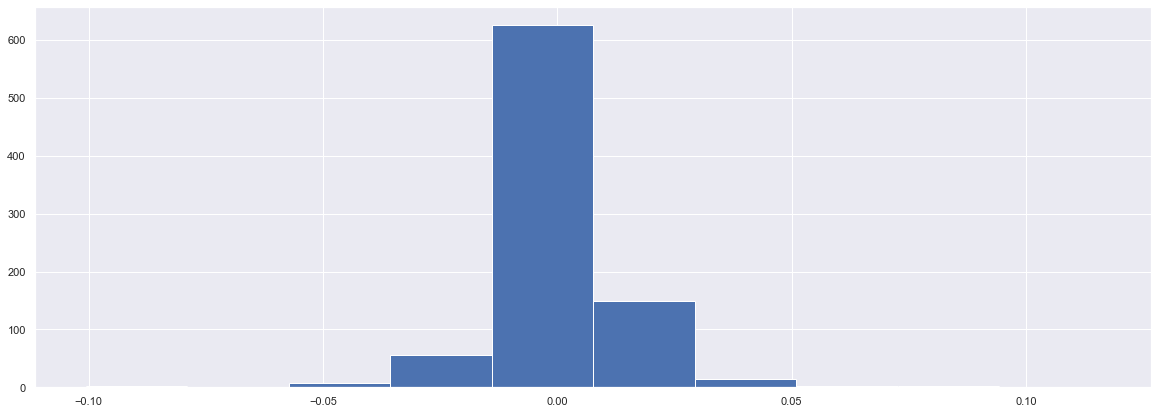

In [ ]:
knn_df.Strategy_returns[split:].hist()
print('Average return: ', knn_df['Strategy_returns'].mean())

## **Random Forest**

In [ ]:
rf_df = df.copy()
rf_df['Open-Close'] = (rf_df.Open - rf_df.Close)/rf_df.Open
rf_df['High-Low'] = (rf_df.High - rf_df.Low)/rf_df.Low
rf_df['percent_change'] = rf_df['Adj Close'].pct_change()
rf_df['std10'] = rf_df['percent_change'].rolling(10).std()
rf_df['ret10'] = rf_df['percent_change'].rolling(10).mean()
rf_df.dropna(inplace=True)

In [ ]:
rf_df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,percent_change,std10,ret10
Date,,,,,,,,,,,
2010-01-15,114.730003,114.839996,113.199997,113.639999,91.038422,212283100,0.009501,0.014488,-0.011224,0.008015,0.001986
2010-01-19,113.620003,115.129997,113.589996,115.059998,92.175987,139172700,-0.012674,0.013558,0.012495,0.007168,0.001539
2010-01-20,114.279999,114.449997,112.980003,113.889999,91.238701,216490200,0.003413,0.013011,-0.010168,0.008040,0.000258
2010-01-21,113.919998,114.269997,111.559998,111.699997,89.484276,344859600,0.019487,0.024292,-0.019229,0.010119,-0.001736
2010-01-22,111.199997,111.739998,109.089996,109.209999,87.489502,345942400,0.017896,0.024292,-0.022292,0.011730,-0.004387
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,417.339996,420.320007,417.079987,419.170013,419.170013,51376700,-0.004385,0.007768,0.010194,0.011632,0.000355
2021-05-25,420.329987,420.709991,417.619995,418.239990,418.239990,57451400,0.004972,0.007399,-0.002219,0.011224,0.001026
2021-05-26,418.869995,419.609985,417.760010,419.070007,419.070007,43088600,-0.000478,0.004428,0.001985,0.008060,0.003349


In [ ]:
# X is the input variable
X = rf_df[['Open-Close', 'High-Low', 'std10', 'ret10']]

# Y is the target or output variable
Y = np.where(rf_df['Adj Close'].shift(-1) > rf_df['Adj Close'], 1, -1)

In [ ]:
split_percentage = 0.7
split = int(split_percentage*len(rf_df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(2003, 4) (2003,) (859, 4) (859,)


In [ ]:
#model fit
clf = RandomForestClassifier(random_state=40)
model = clf.fit(X_train, Y_train)

In [ ]:
print('Correct Prediction (%): ', accuracy_score(Y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  50.640279394644935


In [ ]:
rf_df['Predicted_Signal'] = clf.predict(X)
rf_df['SPY_returns'] = np.log(rf_df['Close']/rf_df['Close'].shift(1))
rf_cumSPY_return = rf_df[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
rf_df['Strategy_returns'] = rf_df['SPY_returns']* rf_df['Predicted_Signal'].shift(1)
rf_cumSTRAT_return = rf_df[split:]['Strategy_returns'].cumsum()*100

[None, None, None, None]

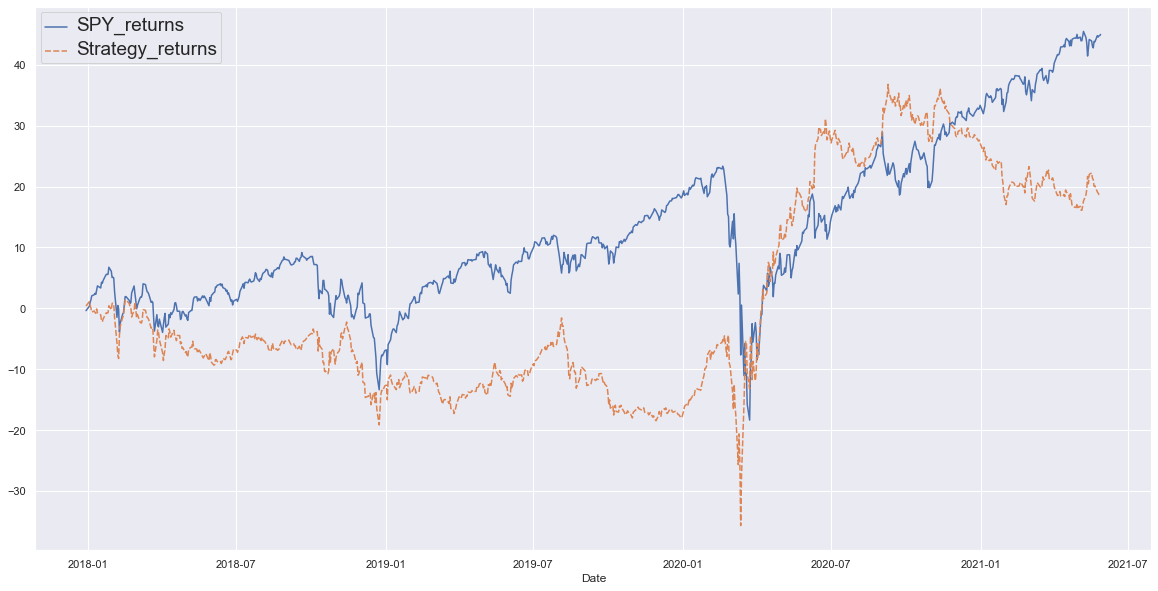

In [ ]:
rf_graph_df = pd.concat([rf_cumSPY_return, rf_cumSTRAT_return], axis=1)
#plt.plot(graph_df)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1) 
ax = sns.lineplot(data = rf_graph_df)
plt.setp(ax.get_legend().get_texts(), fontsize='19')

Average return:  0.0045015992018783415


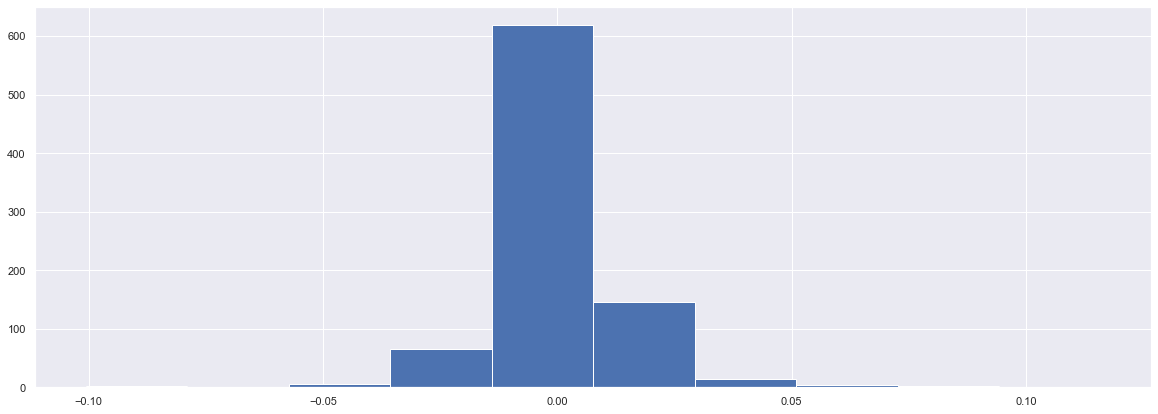

In [ ]:
rf_df.Strategy_returns[split:].hist()
print('Average return: ', rf_df['Strategy_returns'].mean())

In [ ]:
knn_graph_df

,SPY_returns,Strategy_returns
Date,,
2017-12-26,-0.119696,-0.119696
2017-12-27,-0.071052,-0.071052
2017-12-28,0.134478,-0.276582
2017-12-29,-0.243286,-0.654346
2018-01-02,0.469897,0.058837
...,...,...
2021-05-24,44.911961,64.550656
2021-05-25,44.689842,64.772775
2021-05-26,44.888100,64.574517


In [ ]:
app = dash.Dash(__name__)
server = app.server

layout = go.Layout(yaxis=dict(domain=[1, 1]), legend=dict(traceorder='reversed'), yaxis2=dict(domain=[1, 1]), yaxis3=dict(domain=[1, 1]))

fig = go.Figure(layout = layout)


all_options = {
    'K nearest neighobrs': ['knn'],
    'Random forest': ['rf'],

            }

app.layout = html.Div([
        html.Hr(),
    	dcc.Dropdown(
            id='models-dropdown', 
            options=[{'label': k, 'value': k} for k in all_options.keys()],
            value = 'K nearest neigbors',
            multi = False),
        html.Hr(),
    	html.Div(id='show-live'),
        html.Div([dcc.Graph(id='plot', figure = fig)]),
		#dcc.Interval(id='interval-component', interval=1*10000) # in milliseconds
					])

@app.callback(
    dash.dependencies.Output(component_id = 'plot', component_property='figure'),
    [dash.dependencies.Input(component_id = 'models-dropdown', component_property = 'value')] #,

    		)

def update_val(value):



    if value == 'K nearest neighobrs':
        print('{} is working'.format(value))
        print("\n")
        trace1 = go.Scatter(x = knn_graph_df.index, y = knn_graph_df.Strategy_returns, name = "KNN strategy")
        trace2 = go.Scatter(x = knn_graph_df.index, y = knn_graph_df.SPY_returns, name= "SPY return")
        fig = go.Figure(data=[trace1, trace2],layout = go.Layout(title='Return over time',
                                                                 xaxis={'title':'Date'},
                                                                 yaxis={'title':'Return'}))


    elif value == 'Random forest':
        print('{} is working'.format(value))
        print("\n")
        trace1 = go.Scatter(x=rf_graph_df.index, y = rf_graph_df.Strategy_returns, name= "RF strategy")
        trace2 = go.Scatter(x=rf_graph_df.index, y = rf_graph_df.SPY_returns, name= "SPY returns")
        fig = go.Figure(data=[trace1, trace2],layout = go.Layout(
                                                                 title='Return over time',
                                                                 xaxis={'title':'Date'},
                                                                 yaxis={'title':'Return'}))


    return fig


@app.callback(dash.dependencies.Output(component_id = 'show-live', component_property='children'),
    [dash.dependencies.Input(component_id = 'models-dropdown', component_property = 'value')],)

def set_display_children(modelsdropdown):
    if modelsdropdown is None:
        return ''
    else:
        return '{} has been selected'.format(modelsdropdown)




In [ ]:
if __name__=='__main__':
     app.run_server(debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
K nearest neighobrs is working


Random forest is working


K nearest neighobrs is working


